DATASETS

In [ ]:

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="N7OTUaZTksRideheIoOo")
project = rf.workspace("yolo-sjwde").project("tugas-akhir-ndcjq")
version = project.version(11)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 123.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tugas-Akhir--11 in yolov8:: 100%|██████████| 2550/2550 [00:00<00:00, 8808.67it/s]


Distribusi Instanse per kelas sebelum

Jumlah instance per class:
Class 2: 2933 instances
Class 1: 5372 instances
Class 3: 6424 instances
Class 0: 7356 instances


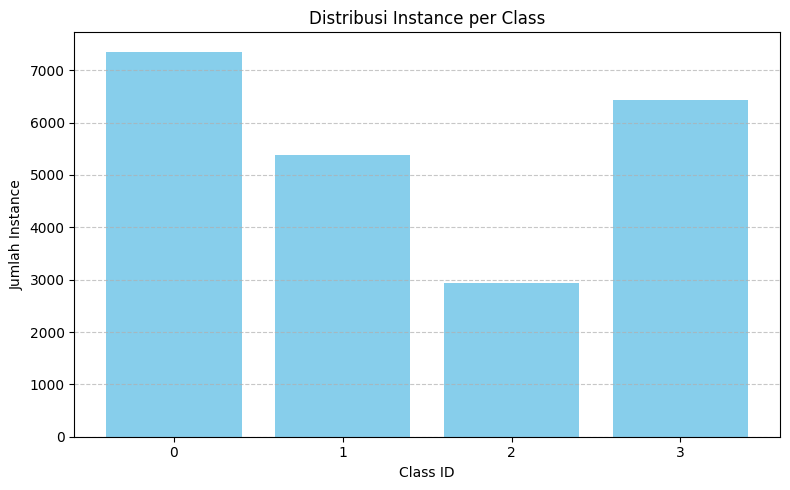

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Path ke folder label YOLO
label_folder = "/content/Tugas-Akhir--11/train/labels"

# Inisialisasi counter
class_counter = Counter()

# Loop semua file label
for filename in os.listdir(label_folder):
    if filename.endswith(".txt"):
        path = os.path.join(label_folder, filename)
        with open(path, "r") as file:
            lines = file.readlines()
            for line in lines:
                class_id = line.split()[0]  # ambil class id
                class_counter[class_id] += 1

# Tampilkan hasil count
print("Jumlah instance per class:")
for class_id, count in class_counter.items():
    print(f"Class {class_id}: {count} instances")

# Visualisasi grafik batang
class_ids = sorted(class_counter.keys())
counts = [class_counter[c] for c in class_ids]

plt.figure(figsize=(8, 5))
plt.bar(class_ids, counts, color="skyblue")
plt.xlabel("Class ID")
plt.ylabel("Jumlah Instance")
plt.title("Distribusi Instance per Class")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
import random

# Path utama
dataset_folder = "/content/Tugas-Akhir--11"
image_folder = os.path.join(dataset_folder, "train/images")
label_folder = os.path.join(dataset_folder, "train/labels")
flag_path = os.path.join(dataset_folder, ".balanced_done")

# ---------- [1] CEK & BACKUP ----------
if os.path.exists(flag_path):
    print("[SKIP] Dataset sudah di-balance sebelumnya")
    exit()

backup_folder = dataset_folder + "-backup"
if not os.path.exists(backup_folder):
    shutil.copytree(dataset_folder, backup_folder)
    print(f"[BACKUP] Dataset dibackup ke: {backup_folder}")

[BACKUP] Dataset dibackup ke: /content/Tugas-Akhir--11-backup


oversampling kelas 1 (papula) dan kelas 2 (pustula)

In [ ]:
import os
import shutil
import random
# ---------- [2] OVERSAMPLING: Function ----------
def oversample_class(target_class, target_instances):
    current_instances = 0
    copy_counter = 0
    label_files = [f for f in os.listdir(label_folder) if f.endswith(".txt")]
    random.shuffle(label_files)

    for filename in label_files:
        with open(os.path.join(label_folder, filename), "r") as f:
            current_instances += sum(1 for line in f if line.startswith(target_class + " "))

    print(f"[INFO] Jumlah awal instance class {target_class}: {current_instances}")

    i = 0
    while current_instances < target_instances and i < len(label_files) * 10:
        filename = label_files[i % len(label_files)]
        label_path = os.path.join(label_folder, filename)

        with open(label_path, "r") as f:
            lines = f.readlines()

        class_lines = [line for line in lines if line.startswith(target_class + " ")]
        if class_lines:
            base_name = os.path.splitext(filename)[0]
            for ext in [".jpg", ".jpeg", ".png"]:
                image_path = os.path.join(image_folder, base_name + ext)
                if os.path.exists(image_path):
                    new_name = f"{base_name}_dup_{target_class}_{copy_counter}"
                    new_image_path = os.path.join(image_folder, new_name + ext)
                    new_label_path = os.path.join(label_folder, new_name + ".txt")

                    shutil.copy(image_path, new_image_path)
                    with open(new_label_path, "w") as f:
                        f.writelines(class_lines)

                    current_instances += len(class_lines)
                    copy_counter += 1
                    print(f"[DUPLICATED] {new_name} ({len(class_lines)} instance)")
                    break
        i += 1

    print(f"[DONE] Oversampling class {target_class} hingga {current_instances}")
    print(f"[INFO] File duplikat dibuat: {copy_counter}")

# ---------- [3] JALANKAN OVERSAMPLING UNTUK CLASS 1 & 2 ----------
oversample_class("1", 6000)
oversample_class("2", 6000)

# ---------- [4] TANDAI SELESAI ----------
with open(flag_path, "w") as f:
    f.write("BALANCED")

print(f"[✅ SELESAI] Dataset sudah seimbang. Tandai dengan: {flag_path}")


[INFO] Jumlah awal instance class 1: 5372
[DUPLICATED] pp154_jpg.rf.b232f9d6005cd628f582babb446478d3_dup_1_0 (4 instance)
[DUPLICATED] pp89_jpg.rf.36260834a1cb046d2ad3018320491281_dup_1_1 (17 instance)
[DUPLICATED] bh50_jpg.rf.161b38572944781bd25143fd2ce5c03c_dup_1_2 (1 instance)
[DUPLICATED] ps114_jpg.rf.bc84f663ee6e2568a27054305db04faa_dup_1_3 (3 instance)
[DUPLICATED] ps19_jpg.rf.bc194cd8bd1cf3b60331b9b333922726_dup_1_4 (1 instance)
[DUPLICATED] ps86_jpg.rf.35fe9b7933a572b24e154cd93af82217_dup_1_5 (6 instance)
[DUPLICATED] bh48_jpg.rf.5e1231c3f379d620d35e74368e142565_dup_1_6 (15 instance)
[DUPLICATED] pp68_jpg.rf.16ffcfa259f83206509a98dc4a6337ff_dup_1_7 (10 instance)
[DUPLICATED] pp17_jpg.rf.e57ca47222564e1a97344a46257a0383_dup_1_8 (3 instance)
[DUPLICATED] pp90_jpg.rf.8de6d7346a6db6c8733667a44ef91159_dup_1_9 (6 instance)
[DUPLICATED] ps81_jpg.rf.3f7440779a44db20685ca151df3e240e_dup_1_10 (3 instance)
[DUPLICATED] pp72_jpg.rf.6e23f744384d1cb373d096cac50a47a4_dup_1_11 (7 instance)
[DU

Undersampling kelas 0 (blackhead)

In [ ]:
# ---------- [2] UNDERSAMPLING: Class 0 ----------
target_class_undersample = "0"
target_instances_under = 6000
current_instances = 0
deleted_files = 0
edited_files = 0

label_files = [f for f in os.listdir(label_folder) if f.endswith(".txt")]
random.shuffle(label_files)

for filename in label_files:
    label_path = os.path.join(label_folder, filename)
    with open(label_path, "r") as f:
        lines = f.readlines()

    class_lines = [line for line in lines if line.startswith(target_class_undersample + " ")]
    other_lines = [line for line in lines if not line.startswith(target_class_undersample + " ")]

    if class_lines:
        if current_instances >= target_instances_under:
            if not other_lines:
                os.remove(label_path)
                base_name = os.path.splitext(filename)[0]
                for ext in [".jpg", ".jpeg", ".png"]:
                    img_path = os.path.join(image_folder, base_name + ext)
                    if os.path.exists(img_path):
                        os.remove(img_path)
                        break
                deleted_files += 1
            else:
                with open(label_path, "w") as f:
                    f.writelines(other_lines)
                edited_files += 1
        else:
            current_instances += len(class_lines)

print(f"[DONE] Undersampling class {target_class_undersample} ke max {target_instances_under}")
print(f"[INFO] Dihapus: {deleted_files}, Diedit: {edited_files}")

[DONE] Undersampling class 0 ke max 6000
[INFO] Dihapus: 13, Diedit: 70


hasil instances sesudahnya


Jumlah instance per class:
Class 2: 6014 instances
Class 1: 6010 instances
Class 3: 6424 instances
Class 0: 6006 instances


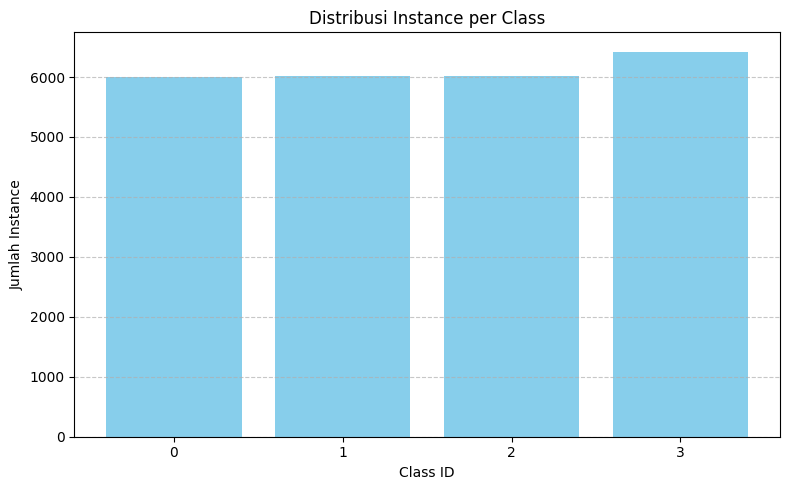

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Path ke folder label YOLO
label_folder = "/content/Tugas-Akhir--11/train/labels"

# Inisialisasi counter
class_counter = Counter()

# Loop semua file label
for filename in os.listdir(label_folder):
    if filename.endswith(".txt"):
        path = os.path.join(label_folder, filename)
        with open(path, "r") as file:
            lines = file.readlines()
            for line in lines:
                class_id = line.split()[0]  # ambil class id
                class_counter[class_id] += 1

# Tampilkan hasil count
print("Jumlah instance per class:")
for class_id, count in class_counter.items():
    print(f"Class {class_id}: {count} instances")

# Visualisasi grafik batang
class_ids = sorted(class_counter.keys())
counts = [class_counter[c] for c in class_ids]

plt.figure(figsize=(8, 5))
plt.bar(class_ids, counts, color="skyblue")
plt.xlabel("Class ID")
plt.ylabel("Jumlah Instance")
plt.title("Distribusi Instance per Class")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
!pip install albumentations
!pip install ultralytics
from ultralytics import YOLO

#Load model YOLOv8s
model = YOLO("yolov8s.pt")

#lokasi dataset yang sudah diproses oleh Roboflow
dataset_path = "/content/Tugas-Akhir--11/train"

#lokasi file yaml untuk dataset yang telah disiapkan di Roboflow
yaml_file = "/content/Tugas-Akhir--11/data.yaml"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

100%|██████████| 21.5M/21.5M [00:00<00:00, 346MB/s]


In [ ]:
import shutil
import os
import random
import numpy as np
import torch

# Atur seed untuk semua library terkait
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Untuk memastikan hasil yang deterministik
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"  # Tambahan untuk CUDA deterministik
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)  # Wajib untuk bitwise identik (torch 1.8+)


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_base = "/content/drive/MyDrive/yolo_resultsnew2"

# Training

# **ADAM**






In [ ]:

model.train(
    data=yaml_file,
    epochs=150,
    batch=16,
    optimizer="Adam",
    lr0=0.0003,
    lrf=0.008,
    weight_decay=0.006,
    dropout=0.14,
    cos_lr=True,
    pretrained=True,
    name="adam",
    save=True

)
shutil.copytree("runs/detect/adam", f"{save_base}/adam", dirs_exist_ok=True)


# **SGD**



In [ ]:

model.train(
    data=yaml_file,
    epochs=150,
    batch=16,
    optimizer="SGD",
    lr0=0.0003,
    lrf=0.008,
    momentum=0.88,
    weight_decay=0.006,
    dropout=0.14,
    cos_lr=True,
    pretrained=True,
    name="sgd",
    save=True

)
shutil.copytree("runs/detect/sgd", f"{save_base}/sgd", dirs_exist_ok=True)



# **AdamW**

In [ ]:
model.train(
    data=yaml_file,
    epochs=150,
    batch=16,
    optimizer="AdamW",
    lr0=0.0003,
    lrf=0.008,  # Learning rate final factor
    weight_decay=0.006,  # Weight decay untuk regularisasi
    dropout=0.14,  # Dropout rate
    cos_lr=True,  # Cosine learning rate scheduler
    pretrained=True,  # Menggunakan pretrained weights
    name="adamw",  # Ubah ke adamw_1 agar sesuai dengan optimizer
    save=True  # Menyimpan model
)
shutil.copytree("runs/detect/adamw", f"{save_base}/AdamW", dirs_exist_ok=True)

# **RAdam**

In [ ]:
model.train(
    data=yaml_file,
    epochs=150,
    batch=16,
    optimizer="RAdam",
    lr0=0.0003,  # Learning rate awal
    lrf=0.008,  # Learning rate final factor
    weight_decay=0.006,  # Weight decay untuk regularisasi
    dropout=0.14,  # Dropout rate
    cos_lr=True,  # Cosine learning rate scheduler
    pretrained=True,  # Menggunakan pretrained weights
    name="RAdam",  # Ubah ke adamw_1 agar sesuai dengan optimizer
    save=True  # Menyimpan model
)
shutil.copytree("runs/detect/RAdam", f"{save_base}/Radam", dirs_exist_ok=True)

#**Nadam**

In [ ]:
model.train(
    data=yaml_file,
    epochs=150,
    batch=16,
    optimizer="NAdam",
    lr0=0.0003,  # Learning rate awal
    lrf=0.008,  # Learning rate final factor
    weight_decay=0.006,  # Weight decay untuk regularisasi
    dropout=0.14,  # Dropout rate
    cos_lr=True,  # Cosine learning rate scheduler
    pretrained=True,  # Menggunakan pretrained weights
    name="NAdam",  # Ubah ke adamw_1 agar sesuai dengan optimizer
    save=True  # Menyimpan model
)
shutil.copytree("runs/detect/NAdam", f"{save_base}/Nadam", dirs_exist_ok=True)

In [ ]:
import pandas as pd
import os

# Daftar nama folder model
model_names = ["adam", "AdamW", "Nadam", "Radam", "sgd"]
base_path = "/content/drive/MyDrive/yolo_resultsnew"

def extract_metrics_from_csv(model_name):
    csv_path = os.path.join(base_path, model_name, "results.csv")
    if not os.path.exists(csv_path):
        return {
            "Model": model_name,
            "Precision": None,
            "Recall": None,
            "mAP50": None,
            "Train Time (hours)": None
        }

    df = pd.read_csv(csv_path)

    # Ambil baris terbaik berdasarkan mAP50
    best_row = df.iloc[df["metrics/mAP50(B)"].idxmax()]

    # Ambil waktu total training dari baris terakhir kolom 'time'
    total_time_sec = df["time"].iloc[-1]
    total_time_hr = round(total_time_sec / 3600, 3)  # konversi ke jam

    return {
        "Model": model_name,
        "Precision": round(best_row["metrics/precision(B)"], 3),
        "Recall": round(best_row["metrics/recall(B)"], 3),
        "mAP50": round(best_row["metrics/mAP50(B)"], 3),
        "Train Time (hours)": total_time_hr
    }

# Gabungkan semua hasil
results = [extract_metrics_from_csv(model) for model in model_names]
df_final = pd.DataFrame(results)

df_final


,Model,Precision,Recall,mAP50,Train Time (hours)
0,adam,0.728,0.671,0.711,0.846
1,AdamW,0.784,0.668,0.726,0.847
2,Nadam,0.823,0.646,0.735,0.847
3,Radam,0.788,0.658,0.720,0.588
4,sgd,0.733,0.676,0.712,0.826


In [ ]:
import os
from collections import Counter

# Folder label validasi
label_folder = "/content/Tugas-Akhir--11/valid/labels"

# Pastikan folder ada
if not os.path.exists(label_folder):
    raise FileNotFoundError(f"Folder label tidak ditemukan: {label_folder}")

class_counts = Counter()
total_instances = 0

# Baca semua file label dan hitung instance per kelas
for label_file in os.listdir(label_folder):
    if label_file.endswith(".txt"):
        with open(os.path.join(label_folder, label_file), "r") as f:
            for line in f:
                cls_id = int(line.strip().split()[0])
                class_counts[cls_id] += 1
                total_instances += 1

# Tampilkan hasil per kelas dan persentasenya
print("📌 Distribusi Kelas di Data Validasi:")
for cls_id, count in sorted(class_counts.items()):
    percent = (count / total_instances) * 100 if total_instances > 0 else 0
    print(f"   - Class {cls_id}: {count} instance ({percent:.2f}%)")

print(f"\n✅ Total instance: {total_instances}")


📌 Distribusi Kelas di Data Validasi:
   - Class 0: 469 instance (31.39%)
   - Class 1: 277 instance (18.54%)
   - Class 2: 231 instance (15.46%)
   - Class 3: 517 instance (34.61%)

✅ Total instance: 1494


In [ ]:
import pandas as pd
from ultralytics import YOLO

model_paths = {
    "Adam": "/content/drive/MyDrive/yolo_resultsnew/adam/weights/best.pt",
    "AdamW": "/content/drive/MyDrive/yolo_resultsnew/AdamW/weights/best.pt",
    "NAdam": "/content/drive/MyDrive/yolo_resultsnew/Nadam/weights/best.pt",
    "RAdam": "/content/drive/MyDrive/yolo_resultsnew/Radam/weights/best.pt",
    "SGD": "/content/drive/MyDrive/yolo_resultsnew/sgd/weights/best.pt",
}

data_yaml_path = "/content/Tugas-Akhir--11/data.yaml"

def extract_metrics_from_test(model_name, model_path):
    model = YOLO(model_path)
    results = model.val(data=data_yaml_path, split="test")
    return {
        "Model": model_name,
        "Precision": round(results.box.mp, 3),  # mean precision
        "Recall": round(results.box.mr, 3),     # mean recall
        "mAP50": round(results.box.map50, 3),   # mean AP@0.5
        "Test Time (s)": round(results.speed['inference'], 2)
    }

results = [extract_metrics_from_test(model, path) for model, path in model_paths.items()]
df_test = pd.DataFrame(results)

print(df_test)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1355.0±338.2 MB/s, size: 42.5 KB)


val: Scanning /content/Tugas-Akhir--11/test/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]


                   all         54       1015      0.744       0.66      0.702      0.345
             blackhead         12        365      0.712      0.622      0.665      0.296
                papula         21        142        0.7      0.641      0.661      0.295
               pustula         17        183      0.825      0.809      0.844       0.51
             whitehead         11        325      0.737      0.566      0.637      0.278
Speed: 0.4ms preprocess, 27.4ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/detect/val18
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1302.7±385.4 MB/s, size: 30.5 KB)


val: Scanning /content/Tugas-Akhir--11/test/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]


                   all         54       1015      0.782      0.681      0.735      0.386
             blackhead         12        365      0.765      0.633      0.717      0.333
                papula         21        142      0.754      0.697      0.718       0.34
               pustula         17        183      0.875      0.807      0.858      0.542
             whitehead         11        325      0.735      0.588      0.648       0.33
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 33.5ms postprocess per image
Results saved to runs/detect/val19
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1155.2±305.0 MB/s, size: 34.5 KB)


val: Scanning /content/Tugas-Akhir--11/test/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]


                   all         54       1015      0.777      0.673      0.725      0.403
             blackhead         12        365      0.762       0.66      0.733      0.358
                papula         21        142       0.75      0.648      0.706      0.369
               pustula         17        183      0.883      0.782      0.847      0.555
             whitehead         11        325      0.712        0.6      0.615      0.331
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 31.4ms postprocess per image
Results saved to runs/detect/val20
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1223.5±387.7 MB/s, size: 29.6 KB)


val: Scanning /content/Tugas-Akhir--11/test/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


                   all         54       1015      0.776      0.673      0.721      0.382
             blackhead         12        365      0.772      0.625      0.698      0.323
                papula         21        142      0.726      0.671      0.698       0.34
               pustula         17        183      0.855       0.77      0.844      0.549
             whitehead         11        325      0.749      0.624      0.642      0.317
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 30.5ms postprocess per image
Results saved to runs/detect/val21
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1258.4±491.9 MB/s, size: 47.5 KB)


val: Scanning /content/Tugas-Akhir--11/test/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]


                   all         54       1015       0.75      0.666       0.71      0.352
             blackhead         12        365      0.739      0.604      0.681      0.301
                papula         21        142      0.714      0.662      0.675      0.307
               pustula         17        183      0.819      0.798       0.83      0.502
             whitehead         11        325      0.727      0.598      0.655      0.298
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 31.1ms postprocess per image
Results saved to runs/detect/val22
   Model  Precision  Recall  mAP50  Test Time (s)
0   Adam      0.744   0.660  0.702          27.44
1  AdamW      0.782   0.681  0.735           4.01
2  NAdam      0.777   0.673  0.725           4.00
3  RAdam      0.776   0.673  0.721           3.99
4    SGD      0.750   0.666  0.710           4.00


In [ ]:
import pandas as pd
from ultralytics import YOLO

class_names = ["Blackhead", "Papula", "Pustula", "Whitehead"]

model_paths = {
    "Adam": "/content/drive/MyDrive/yolo_resultsnew/adam/weights/best.pt",
    "AdamW": "/content/drive/MyDrive/yolo_resultsnew/AdamW/weights/best.pt",
    "NAdam": "/content/drive/MyDrive/yolo_resultsnew/Nadam/weights/best.pt",
    "RAdam": "/content/drive/MyDrive/yolo_resultsnew/Radam/weights/best.pt",
    "SGD": "/content/drive/MyDrive/yolo_resultsnew/sgd/weights/best.pt",
}

data_yaml_path = "/content/Tugas-Akhir--11/data.yaml"   # Ganti dengan path data.yaml yang testsetnya benar

def get_map50_per_class_from_path(model_path, model_name):
    model = YOLO(model_path)
    results = model.val(data=data_yaml_path, split="train")  # split="test" jika testset-mu di-definisikan
    map50_scores = []
    for i in range(len(class_names)):
        m50 = results.class_result(i)[2]
        map50_scores.append(round(m50, 3))
    return pd.Series(map50_scores, index=class_names, name=model_name)

df_map50 = pd.DataFrame({
    model: get_map50_per_class_from_path(path, model)
    for model, path in model_paths.items()
})
df_map50.index.name = "Class"
print(df_map50)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 97.3MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1578.4±522.1 MB/s, size: 38.6 KB)



val: Scanning /content/Tugas-Akhir--11/train/labels... 1875 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1875/1875 [00:01<00:00, 1452.73it/s]

val: New cache created: /content/Tugas-Akhir--11/train/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:19<00:00,  5.93it/s]


                   all       1875      24444      0.687      0.859      0.767      0.595
             blackhead        384       6009      0.527       0.69      0.582       0.36
                papula        825       6004      0.655      0.921      0.797      0.627
               pustula       1334       6007      0.949      0.992      0.963      0.897
             whitehead        478       6424      0.618      0.832      0.728      0.496
Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 974.1±465.1 MB/s, size: 30.4 KB)


val: Scanning /content/Tugas-Akhir--11/train/labels.cache... 1875 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1875/1875 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:18<00:00,  6.27it/s]


                   all       1875      24444      0.697       0.89      0.799      0.663
             blackhead        384       6009      0.542      0.723      0.599       0.41
                papula        825       6004      0.663      0.957      0.853      0.726
               pustula       1334       6007      0.957      0.997      0.965       0.92
             whitehead        478       6424      0.627      0.883      0.781      0.598
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val2
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1511.8±535.5 MB/s, size: 39.6 KB)


val: Scanning /content/Tugas-Akhir--11/train/labels.cache... 1875 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1875/1875 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:18<00:00,  6.28it/s]


                   all       1875      24444      0.698      0.897      0.803      0.673
             blackhead        384       6009      0.544      0.729      0.604      0.424
                papula        825       6004      0.664      0.963      0.855      0.737
               pustula       1334       6007      0.956      0.996      0.964       0.92
             whitehead        478       6424      0.628      0.899      0.787      0.611
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val3
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1523.6±716.0 MB/s, size: 39.6 KB)


val: Scanning /content/Tugas-Akhir--11/train/labels.cache... 1875 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1875/1875 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:19<00:00,  6.15it/s]


                   all       1875      24444      0.696      0.886       0.79      0.651
             blackhead        384       6009      0.544      0.709      0.586      0.403
                papula        825       6004       0.66      0.954      0.845      0.717
               pustula       1334       6007      0.954      0.997      0.964      0.911
             whitehead        478       6424      0.624      0.882      0.767      0.573
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val4
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1369.0±700.9 MB/s, size: 34.2 KB)


val: Scanning /content/Tugas-Akhir--11/train/labels.cache... 1875 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1875/1875 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:19<00:00,  6.20it/s]


                   all       1875      24444      0.689      0.865      0.775      0.608
             blackhead        384       6009      0.535      0.694       0.59      0.374
                papula        825       6004      0.654       0.93       0.81      0.643
               pustula       1334       6007       0.95      0.992      0.963      0.899
             whitehead        478       6424      0.619      0.844      0.739      0.517
Speed: 0.2ms preprocess, 4.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val5
            Adam  AdamW  NAdam  RAdam    SGD
Class                                       
Blackhead  0.582  0.599  0.604  0.586  0.590
Papula     0.797  0.853  0.855  0.845  0.810
Pustula    0.963  0.965  0.964  0.964  0.963
Whitehead  0.728  0.781  0.787  0.767  0.739



image 1/1 /content/Tugas-Akhir--11/valid/images/pp58_png.rf.9f2be493ab78b7f7eea7d247911aeb60.jpg: 640x640 1 papula, 9.0ms
Speed: 4.8ms preprocess, 9.0ms inference, 352.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/wh37_jpg.rf.882bb896887a68aba2f57f18d1f0db9d.jpg: 640x640 1 pustula, 2 whiteheads, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/wh14_jpg.rf.eba236e297e1cb19c4e0acaccc587990.jpg: 640x640 1 papula, 15 whiteheads, 7.7ms
Speed: 2.4ms preprocess, 7.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/pp156_jpg.rf.da1300e7841fcaa26cab6ca21ec15476.jpg: 640x640 2 pustulas, 4 whiteheads, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/ps95_jpg.rf.e7ca0e088986e2

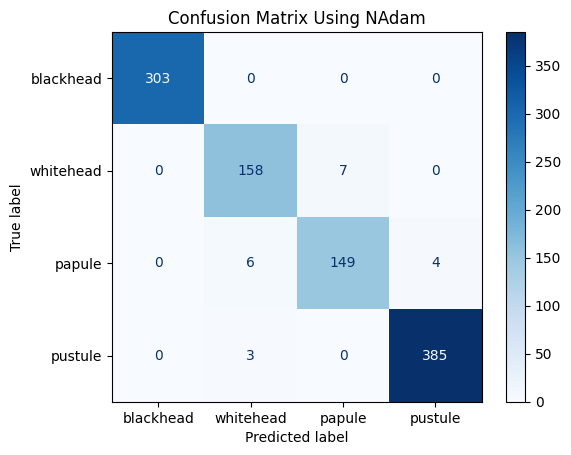

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ID ke label (urutkan sesuai data.yaml/labelmu)
id2label = {
    0: "blackhead",
    1: "whitehead",
    2: "papule",
    3: "pustule"
}

# Model (ganti path jika perlu)
model = YOLO("/content/drive/MyDrive/yolo_resultsnew/Nadam/weights/best.pt")

# Folder VALIDATION
image_folder = "/content/Tugas-Akhir--11/valid/images"
label_folder = "/content/Tugas-Akhir--11/valid/labels"

IOU_THRESHOLD = 0.5

true_labels = []
pred_labels = []

def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return interArea / float(box1Area + box2Area - interArea + 1e-6)

for filename in os.listdir(image_folder):
    if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    image_path = os.path.join(image_folder, filename)
    label_path = os.path.join(label_folder, os.path.splitext(filename)[0] + ".txt")
    if not os.path.exists(label_path):
        print(f"[Warning] Label file missing: {label_path}")
        continue

    # Load GT boxes/classes
    gt_boxes, gt_classes = [], []
    img = cv2.imread(image_path)
    if img is None:
        print(f"[Warning] Cannot read image: {image_path}")
        continue
    h_img, w_img = img.shape[:2]
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5: continue
            cls, cx, cy, w, h = map(float, parts)
            x1 = int((cx - w / 2) * w_img)
            y1 = int((cy - h / 2) * h_img)
            x2 = int((cx + w / 2) * w_img)
            y2 = int((cy + h / 2) * h_img)
            gt_boxes.append([x1, y1, x2, y2])
            gt_classes.append(int(cls))

    # YOLO predict
    results = model(image_path)
    result = results[0]
    pred_boxes = result.boxes.xyxy.cpu().numpy() if hasattr(result.boxes, "xyxy") else np.empty((0, 4))
    pred_classes = result.boxes.cls.cpu().numpy() if hasattr(result.boxes, "cls") else np.array([])

    if len(pred_classes) == 0:
        print(f"[Info] No prediction for: {filename}")

    matched_gt = set()
    for pb, pc in zip(pred_boxes, pred_classes):
        best_iou, best_idx = 0, -1
        for idx, gt_box in enumerate(gt_boxes):
            if idx in matched_gt:
                continue
            iou = compute_iou(pb, gt_box)
            if iou > best_iou:
                best_iou, best_idx = iou, idx
        if best_iou >= IOU_THRESHOLD:
            true_labels.append(gt_classes[best_idx])
            pred_labels.append(int(pc))
            matched_gt.add(best_idx)

print(f"\n[Summary] Total pairs matched: {len(true_labels)}")

if len(true_labels) == 0 or len(pred_labels) == 0:
    print("[ERROR] Tidak ada prediksi yang matching ground truth di valid set!")
    print("Coba cek satu gambar secara manual. Misal:")
    # Coba tampilkan hasil prediksi satu file
    sample_file = next((f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')), None)
    if sample_file:
        img_path = os.path.join(image_folder, sample_file)
        results = model(img_path)
        result = results[0]
        print("Sample file:", sample_file)
        print("Predicted classes:", result.boxes.cls.cpu().numpy() if hasattr(result.boxes, "cls") else [])
        print("Predicted boxes:", result.boxes.xyxy.cpu().numpy() if hasattr(result.boxes, "xyxy") else [])
    print("Atau turunkan IOU_THRESHOLD ke 0.3 dan coba lagi.")
else:
    cm_labels = sorted(id2label.keys())
    cm = confusion_matrix(true_labels, pred_labels, labels=cm_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[id2label[i] for i in cm_labels])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix Using NAdam")
    plt.show()



image 1/1 /content/Tugas-Akhir--11/valid/images/pp58_png.rf.9f2be493ab78b7f7eea7d247911aeb60.jpg: 640x640 1 papula, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/wh37_jpg.rf.882bb896887a68aba2f57f18d1f0db9d.jpg: 640x640 2 whiteheads, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/wh14_jpg.rf.eba236e297e1cb19c4e0acaccc587990.jpg: 640x640 1 blackhead, 2 papulas, 17 whiteheads, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/pp156_jpg.rf.da1300e7841fcaa26cab6ca21ec15476.jpg: 640x640 3 pustulas, 4 whiteheads, 7.6ms
Speed: 3.4ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/ps95_jpg.rf.e7ca0e088986e

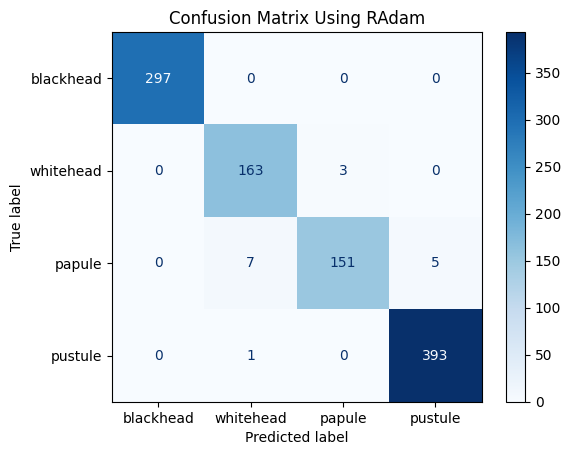

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ID ke label (urutkan sesuai data.yaml/labelmu)
id2label = {
    0: "blackhead",
    1: "whitehead",
    2: "papule",
    3: "pustule"
}

# Model (ganti path jika perlu)
model = YOLO("/content/drive/MyDrive/yolo_resultsnew/Radam/weights/best.pt")

# Folder VALIDATION
image_folder = "/content/Tugas-Akhir--11/valid/images"
label_folder = "/content/Tugas-Akhir--11/valid/labels"

IOU_THRESHOLD = 0.5

true_labels = []
pred_labels = []

def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return interArea / float(box1Area + box2Area - interArea + 1e-6)

for filename in os.listdir(image_folder):
    if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    image_path = os.path.join(image_folder, filename)
    label_path = os.path.join(label_folder, os.path.splitext(filename)[0] + ".txt")
    if not os.path.exists(label_path):
        print(f"[Warning] Label file missing: {label_path}")
        continue

    # Load GT boxes/classes
    gt_boxes, gt_classes = [], []
    img = cv2.imread(image_path)
    if img is None:
        print(f"[Warning] Cannot read image: {image_path}")
        continue
    h_img, w_img = img.shape[:2]
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5: continue
            cls, cx, cy, w, h = map(float, parts)
            x1 = int((cx - w / 2) * w_img)
            y1 = int((cy - h / 2) * h_img)
            x2 = int((cx + w / 2) * w_img)
            y2 = int((cy + h / 2) * h_img)
            gt_boxes.append([x1, y1, x2, y2])
            gt_classes.append(int(cls))

    # YOLO predict
    results = model(image_path)
    result = results[0]
    pred_boxes = result.boxes.xyxy.cpu().numpy() if hasattr(result.boxes, "xyxy") else np.empty((0, 4))
    pred_classes = result.boxes.cls.cpu().numpy() if hasattr(result.boxes, "cls") else np.array([])

    if len(pred_classes) == 0:
        print(f"[Info] No prediction for: {filename}")

    matched_gt = set()
    for pb, pc in zip(pred_boxes, pred_classes):
        best_iou, best_idx = 0, -1
        for idx, gt_box in enumerate(gt_boxes):
            if idx in matched_gt:
                continue
            iou = compute_iou(pb, gt_box)
            if iou > best_iou:
                best_iou, best_idx = iou, idx
        if best_iou >= IOU_THRESHOLD:
            true_labels.append(gt_classes[best_idx])
            pred_labels.append(int(pc))
            matched_gt.add(best_idx)

print(f"\n[Summary] Total pairs matched: {len(true_labels)}")

if len(true_labels) == 0 or len(pred_labels) == 0:
    print("[ERROR] Tidak ada prediksi yang matching ground truth di valid set!")
    print("Coba cek satu gambar secara manual. Misal:")
    # Coba tampilkan hasil prediksi satu file
    sample_file = next((f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')), None)
    if sample_file:
        img_path = os.path.join(image_folder, sample_file)
        results = model(img_path)
        result = results[0]
        print("Sample file:", sample_file)
        print("Predicted classes:", result.boxes.cls.cpu().numpy() if hasattr(result.boxes, "cls") else [])
        print("Predicted boxes:", result.boxes.xyxy.cpu().numpy() if hasattr(result.boxes, "xyxy") else [])
    print("Atau turunkan IOU_THRESHOLD ke 0.3 dan coba lagi.")
else:
    cm_labels = sorted(id2label.keys())
    cm = confusion_matrix(true_labels, pred_labels, labels=cm_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[id2label[i] for i in cm_labels])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix Using RAdam")
    plt.show()



image 1/1 /content/Tugas-Akhir--11/valid/images/pp58_png.rf.9f2be493ab78b7f7eea7d247911aeb60.jpg: 640x640 1 papula, 1 pustula, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/wh37_jpg.rf.882bb896887a68aba2f57f18d1f0db9d.jpg: 640x640 1 pustula, 1 whitehead, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/wh14_jpg.rf.eba236e297e1cb19c4e0acaccc587990.jpg: 640x640 1 papula, 15 whiteheads, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/pp156_jpg.rf.da1300e7841fcaa26cab6ca21ec15476.jpg: 640x640 3 pustulas, 4 whiteheads, 7.8ms
Speed: 1.9ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Tugas-Akhir--11/valid/images/ps95_jpg.rf.e7ca0e

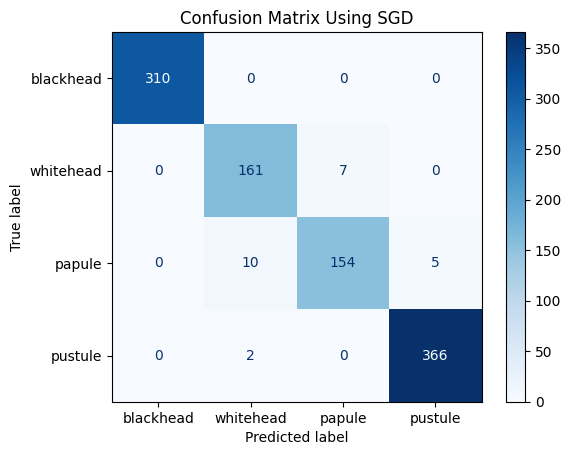

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ID ke label (urutkan sesuai data.yaml/labelmu)
id2label = {
    0: "blackhead",
    1: "whitehead",
    2: "papule",
    3: "pustule"
}

# Model (ganti path jika perlu)
model = YOLO("/content/drive/MyDrive/yolo_resultsnew/sgd/weights/best.pt")

# Folder VALIDATION
image_folder = "/content/Tugas-Akhir--11/valid/images"
label_folder = "/content/Tugas-Akhir--11/valid/labels"

IOU_THRESHOLD = 0.5

true_labels = []
pred_labels = []

def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return interArea / float(box1Area + box2Area - interArea + 1e-6)

for filename in os.listdir(image_folder):
    if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    image_path = os.path.join(image_folder, filename)
    label_path = os.path.join(label_folder, os.path.splitext(filename)[0] + ".txt")
    if not os.path.exists(label_path):
        print(f"[Warning] Label file missing: {label_path}")
        continue

    # Load GT boxes/classes
    gt_boxes, gt_classes = [], []
    img = cv2.imread(image_path)
    if img is None:
        print(f"[Warning] Cannot read image: {image_path}")
        continue
    h_img, w_img = img.shape[:2]
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5: continue
            cls, cx, cy, w, h = map(float, parts)
            x1 = int((cx - w / 2) * w_img)
            y1 = int((cy - h / 2) * h_img)
            x2 = int((cx + w / 2) * w_img)
            y2 = int((cy + h / 2) * h_img)
            gt_boxes.append([x1, y1, x2, y2])
            gt_classes.append(int(cls))

    # YOLO predict
    results = model(image_path)
    result = results[0]
    pred_boxes = result.boxes.xyxy.cpu().numpy() if hasattr(result.boxes, "xyxy") else np.empty((0, 4))
    pred_classes = result.boxes.cls.cpu().numpy() if hasattr(result.boxes, "cls") else np.array([])

    if len(pred_classes) == 0:
        print(f"[Info] No prediction for: {filename}")

    matched_gt = set()
    for pb, pc in zip(pred_boxes, pred_classes):
        best_iou, best_idx = 0, -1
        for idx, gt_box in enumerate(gt_boxes):
            if idx in matched_gt:
                continue
            iou = compute_iou(pb, gt_box)
            if iou > best_iou:
                best_iou, best_idx = iou, idx
        if best_iou >= IOU_THRESHOLD:
            true_labels.append(gt_classes[best_idx])
            pred_labels.append(int(pc))
            matched_gt.add(best_idx)

print(f"\n[Summary] Total pairs matched: {len(true_labels)}")

if len(true_labels) == 0 or len(pred_labels) == 0:
    print("[ERROR] Tidak ada prediksi yang matching ground truth di valid set!")
    print("Coba cek satu gambar secara manual. Misal:")
    # Coba tampilkan hasil prediksi satu file
    sample_file = next((f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')), None)
    if sample_file:
        img_path = os.path.join(image_folder, sample_file)
        results = model(img_path)
        result = results[0]
        print("Sample file:", sample_file)
        print("Predicted classes:", result.boxes.cls.cpu().numpy() if hasattr(result.boxes, "cls") else [])
        print("Predicted boxes:", result.boxes.xyxy.cpu().numpy() if hasattr(result.boxes, "xyxy") else [])
    print("Atau turunkan IOU_THRESHOLD ke 0.3 dan coba lagi.")
else:
    cm_labels = sorted(id2label.keys())
    cm = confusion_matrix(true_labels, pred_labels, labels=cm_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[id2label[i] for i in cm_labels])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix Using SGD")
    plt.show()


In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ID ke label (urutkan sesuai data.yaml/labelmu)
id2label = {
    0: "blackhead",
    1: "whitehead",
    2: "papule",
    3: "pustule"
}

# Model (ganti path jika perlu)
model = YOLO("/content/drive/MyDrive/yolo_resultsnew/AdamW/weights/best.pt")

# Folder VALIDATION
image_folder = "/content/Tugas-Akhir--11/valid/images"
label_folder = "/content/Tugas-Akhir--11/valid/labels"

IOU_THRESHOLD = 0.5

true_labels = []
pred_labels = []

def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    return interArea / float(box1Area + box2Area - interArea + 1e-6)

for filename in os.listdir(image_folder):
    if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    image_path = os.path.join(image_folder, filename)
    label_path = os.path.join(label_folder, os.path.splitext(filename)[0] + ".txt")
    if not os.path.exists(label_path):
        print(f"[Warning] Label file missing: {label_path}")
        continue

    # Load GT boxes/classes
    gt_boxes, gt_classes = [], []
    img = cv2.imread(image_path)
    if img is None:
        print(f"[Warning] Cannot read image: {image_path}")
        continue
    h_img, w_img = img.shape[:2]
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5: continue
            cls, cx, cy, w, h = map(float, parts)
            x1 = int((cx - w / 2) * w_img)
            y1 = int((cy - h / 2) * h_img)
            x2 = int((cx + w / 2) * w_img)
            y2 = int((cy + h / 2) * h_img)
            gt_boxes.append([x1, y1, x2, y2])
            gt_classes.append(int(cls))

    # YOLO predict
    results = model(image_path)
    result = results[0]
    pred_boxes = result.boxes.xyxy.cpu().numpy() if hasattr(result.boxes, "xyxy") else np.empty((0, 4))
    pred_classes = result.boxes.cls.cpu().numpy() if hasattr(result.boxes, "cls") else np.array([])

    if len(pred_classes) == 0:
        print(f"[Info] No prediction for: {filename}")

    matched_gt = set()
    for pb, pc in zip(pred_boxes, pred_classes):
        best_iou, best_idx = 0, -1
        for idx, gt_box in enumerate(gt_boxes):
            if idx in matched_gt:
                continue
            iou = compute_iou(pb, gt_box)
            if iou > best_iou:
                best_iou, best_idx = iou, idx
        if best_iou >= IOU_THRESHOLD:
            true_labels.append(gt_classes[best_idx])
            pred_labels.append(int(pc))
            matched_gt.add(best_idx)

print(f"\n[Summary] Total pairs matched: {len(true_labels)}")

if len(true_labels) == 0 or len(pred_labels) == 0:
    print("[ERROR] Tidak ada prediksi yang matching ground truth di valid set!")
    print("Coba cek satu gambar secara manual. Misal:")
    # Coba tampilkan hasil prediksi satu file
    sample_file = next((f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')), None)
    if sample_file:
        img_path = os.path.join(image_folder, sample_file)
        results = model(img_path)
        result = results[0]
        print("Sample file:", sample_file)
        print("Predicted classes:", result.boxes.cls.cpu().numpy() if hasattr(result.boxes, "cls") else [])
        print("Predicted boxes:", result.boxes.xyxy.cpu().numpy() if hasattr(result.boxes, "xyxy") else [])
    print("Atau turunkan IOU_THRESHOLD ke 0.3 dan coba lagi.")
else:
    cm_labels = sorted(id2label.keys())
    cm = confusion_matrix(true_labels, pred_labels, labels=cm_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[id2label[i] for i in cm_labels])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (Validation Set, tanpa background)")
    plt.show()


# Testing

In [ ]:
from ultralytics import YOLO

# Load semua model terbaik
model_AdamW = YOLO("/content/drive/MyDrive/yolo_results/AdamW/weights/best.pt")
model_Adam = YOLO("/content/drive/MyDrive/yolo_results/adam/weights/best.pt")
model_Radam = YOLO("/content/drive/MyDrive/yolo_results/Radam/weights/best.pt")
model_Nadam = YOLO("/content/drive/MyDrive/yolo_results/Nadam/weights/best.pt")
model_sgd= YOLO("/content/drive/MyDrive/yolo_results/sgd/weights/best.pt")


In [ ]:
# validasi untuk test set
results_adam = model_Adam.val(data="/content/Tugas-Akhir--11/data.yaml", split="test")
results_adamw = model_AdamW.val(data="/content/Tugas-Akhir--11/data.yaml", split="test")
results_radam = model_Radam.val(data="/content/Tugas-Akhir--11/data.yaml", split="test")
results_nadam = model_Nadam.val(data="/content/Tugas-Akhir--11/data.yaml", split="test")
results_sgd = model_sgd.val(data="/content/Tugas-Akhir--11/data.yaml", split="test")


In [ ]:
import pandas as pd

# Fungsi untuk menghitung F1 dari precision dan recall global
def extract_global_f1(results, model_name="Model"):
    precision = results.results_dict['metrics/precision(B)']
    recall = results.results_dict['metrics/recall(B)']
    map50 = results.results_dict['metrics/mAP50(B)']


    return {
        "Model": model_name,
        "Precision": precision,
        "Recall": recall,
        "mAP50": map50,

    }

# Buat tabel dari semua model
global_adam = extract_global_f1(results_adam, "Adam ")
global_adamw = extract_global_f1(results_adamw, "AdamW")
global_Nadam = extract_global_f1(results_nadam, "NAdam")
global_Radam = extract_global_f1(results_radam, "RAdam")
global_sgd = extract_global_f1(results_sgd, "SGD")

# Gabungkan ke dalam dataframe
df_global_f1 = pd.DataFrame([global_adam, global_adamw, global_Nadam, global_Radam, global_sgd])
df_global_f1


##Percobaan deteksi

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Fungsi konversi warna BGR ke RGB
def bgr_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Warna per kelas jerawat
class_colors = {
    "blackhead": (0, 0, 255),    # Merah
    "whitehead": (0, 255, 0),    # Hijau
    "papule": (255, 0, 0),       # Biru
    "pustule": (255, 255, 0)     # Kuning
    # Tambahkan jika ada kelas lain
}

# Path gambar uji
image_paths = {
    "Result 1": "/content/Tugas-Akhir--11/test/images/bh2-4_jpg.rf.d4a44f570526d3e35b3c122cf0c66310.jpg",
    "Result 2": "/content/Tugas-Akhir--11-backup/test/images/pp71_jpg.rf.6c9e1c0732f370f6aab6cdd059d5450f.jpg",
    "Result 3": "/content/Tugas-Akhir--11/test/images/ps147_jpg.rf.c4a87988907323029801aff7efd41d47.jpg",
    "Result 4": "/content/Tugas-Akhir--11/test/images/wh72_jpg.rf.6085548c4a5a860eacdfb1e47167403e.jpg"
}

# Load semua model terbaik
models = {
    "Adam": YOLO("/content/drive/MyDrive/yolo_resultsnew/adam/weights/best.pt"),
    "AdamW": YOLO("/content/drive/MyDrive/yolo_resultsnew/AdamW/weights/best.pt"),
    "RAdam": YOLO("/content/drive/MyDrive/yolo_resultsnew/Radam/weights/best.pt"),
    "NAdam": YOLO("/content/drive/MyDrive/yolo_resultsnew/Nadam/weights/best.pt"),
    "SGD": YOLO("/content/drive/MyDrive/yolo_resultsnew/sgd/weights/best.pt")
}

# Plot hasil prediksi
fig, axes = plt.subplots(len(image_paths), len(models), figsize=(20, 4 * len(image_paths)))

for i, (kelas, path) in enumerate(image_paths.items()):
    for j, (opt_name, model) in enumerate(models.items()):
        img = cv2.imread(path)
        results = model(path)

        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                label = result.names[int(box.cls[0])]
                confidence = box.conf[0]

                # Pilih warna sesuai label (kelas jerawat)
                color = class_colors.get(label, (255, 255, 255))  # Putih jika kelas tidak dikenali

                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                label_text = f"{label} {confidence:.2f}"
                cv2.putText(img, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        axes[i, j].imshow(bgr_to_rgb(img))
        axes[i, j].set_title(f"{kelas} - {opt_name}")
        axes[i, j].axis("off")

plt.tight_layout()
plt.show()
